**Gambler's ruin**

Consider 2 gamblers **A** and **B**. A starts with \$i and B with \$N-i. They play multiple rounds in a game. In each round, they bet \$1. The game ends when either of the gamblers goes bankrupt.

Prob of A winning a round = p, Prob B winning a round = q = (1-p)

Assumptions:
1. Each round is independent. => P(A winning round|A lost/won previous round) = P(A winning round | A has \$i) = P(A winning round) = p

Calculate **P(A winning the game| A has \$i)**

Solution:
1. If p=q=0.5, **P(A winning game | A has \$i)=i/N**
2. If p!=q, **P(A winning game | A has \$i)=(1-(q/p)^i)/(1-(q/p)^N)**

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy.stats as stats
from operator import itemgetter
from tqdm import tqdm
from collections import Counter

In [ ]:
def execute_gamblers_ruin(N, i, prob_gambler_A_wins=0.5, game_count = 100):

  def execute_game(N, i, prob_gambler_A_wins):
    #prob_range = [pp for pp in np.arange (0, 1.001, 0.01)]
    #int_upper_limit_gamabler_A_wins = int(10*prob_gambler_A_wins)
    money_gambler_A_at_start_of_round = i
    round_count = 0

    ## Execute rounds within the game
    while money_gambler_A_at_start_of_round not in [0, N]:
      round_count+=1
      person_winning = 'A' if random.uniform(0, 1)<=prob_gambler_A_wins else 'B'
      if person_winning == 'A':
        money_gambler_A_at_start_of_round+=1
      else:
        money_gambler_A_at_start_of_round-=1

    person_winning_game = 'A' if money_gambler_A_at_start_of_round == N else 'B'
    return person_winning_game

  game_result_list = [execute_game(N, i, prob_gambler_A_wins) for game_count in range(game_count)]
  game_result_counter = Counter(game_result_list)
  return {f'P(A wins game|starts with ${i})':game_result_counter.get('A', 0)/len(game_result_list), f'P(B wins game |starts with ${N-i})':game_result_counter.get('B', 0)/len(game_result_list)}

In [ ]:
N = 20
i = 10
probability_list_when_p_equal_q = [execute_gamblers_ruin(N, i, prob_gambler_A_wins=0.5, game_count = 1000) for _ in range(100)]
A_winning_game_when_p_equal_q = list(map(itemgetter(f'P(A wins game|starts with ${i})'), probability_list_when_p_equal_q))
stats.ttest_1samp(a=A_winning_game_when_p_equal_q, popmean=i/N)

Ttest_1sampResult(statistic=-2.555281911816174, pvalue=0.01213196122567597)

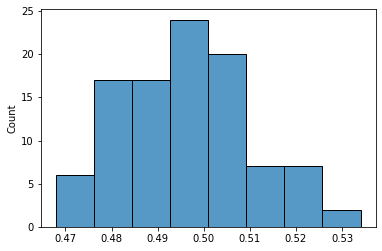

In [ ]:
sns.histplot(x=A_winning_game_when_p_equal_q)

In [ ]:
N = 20
i = 3
probability_list_when_p_equal_q = [execute_gamblers_ruin(N, i, prob_gambler_A_wins=0.5, game_count = 1000) for _ in range(100)]
A_winning_game_when_p_equal_q = list(map(itemgetter(f'P(A wins game|starts with ${i})'), probability_list_when_p_equal_q))
stats.ttest_1samp(a=A_winning_game_when_p_equal_q, popmean=i/N)

Ttest_1sampResult(statistic=-0.7709353970352271, pvalue=0.44258127269004954)

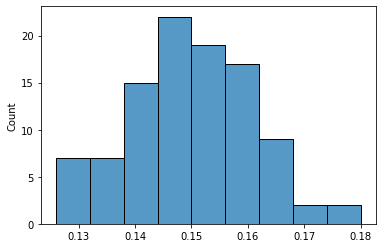

In [ ]:
sns.histplot(x=A_winning_game_when_p_equal_q)

In [ ]:
N = 20
i = 18
probability_list_when_p_equal_q = [execute_gamblers_ruin(N, i, prob_gambler_A_wins=0.5, game_count = 1000) for _ in range(100)]
A_winning_game_when_p_equal_q = list(map(itemgetter(f'P(A wins game|starts with ${i})'), probability_list_when_p_equal_q))
stats.ttest_1samp(a=A_winning_game_when_p_equal_q, popmean=i/N)

Ttest_1sampResult(statistic=1.5275720300227933, pvalue=0.12980759035277953)

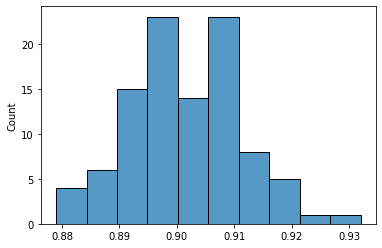

In [ ]:
sns.histplot(x=A_winning_game_when_p_equal_q)

Case 2: p!=q

In [ ]:
N = 20
i = 10
p = 0.65
probability_list_when_p_not_equal_q = [execute_gamblers_ruin(N, i, prob_gambler_A_wins=p, game_count = 1000) for _ in range(100)]
A_winning_game_when_p_not_equal_q = list(map(itemgetter(f'P(A wins game|starts with ${i})'), probability_list_when_p_not_equal_q))
stats.ttest_1samp(a=A_winning_game_when_p_not_equal_q, popmean=(1-((1-p)/p)**i)/(1-((1-p)/p)**N))

Ttest_1sampResult(statistic=0.6259493955810402, pvalue=0.5327886217769251)

In [ ]:
(1-((1-p)/p)**i)/(1-((1-p)/p)**N)

0.9979551667044606

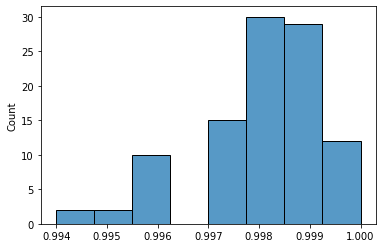

In [ ]:
sns.histplot(x=A_winning_game_when_p_not_equal_q)

In [ ]:
N = 20
i = 3
p = 0.65
probability_list_when_p_not_equal_q = [execute_gamblers_ruin(N, i, prob_gambler_A_wins=p, game_count = 1000) for _ in range(100)]
A_winning_game_when_p_not_equal_q = list(map(itemgetter(f'P(A wins game|starts with ${i})'), probability_list_when_p_not_equal_q))
stats.ttest_1samp(a=A_winning_game_when_p_not_equal_q, popmean=(1-((1-p)/p)**i)/(1-((1-p)/p)**N))

Ttest_1sampResult(statistic=0.20293272607695015, pvalue=0.8396041090465306)

In [ ]:
(1-((1-p)/p)**i)/(1-((1-p)/p)**N)

0.8438815585090813

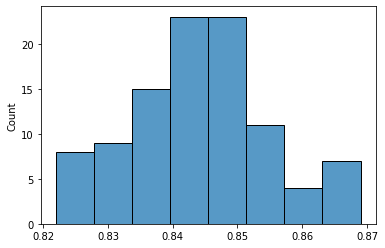

In [ ]:
sns.histplot(x=A_winning_game_when_p_not_equal_q)

In [ ]:
N = 20
i = 3
p = 0.35
probability_list_when_p_not_equal_q = [execute_gamblers_ruin(N, i, prob_gambler_A_wins=p, game_count = 1000) for _ in range(200)]
A_winning_game_when_p_not_equal_q = list(map(itemgetter(f'P(A wins game|starts with ${i})'), probability_list_when_p_not_equal_q))
stats.ttest_1samp(a=A_winning_game_when_p_not_equal_q, popmean=(1-((1-p)/p)**i)/(1-((1-p)/p)**N))

Ttest_1sampResult(statistic=0.20835896091202452, pvalue=0.8351617984173202)

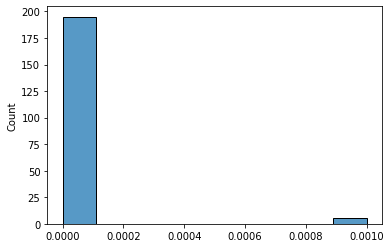

In [ ]:
sns.histplot(x=A_winning_game_when_p_not_equal_q)